# Apprentissage statistique

* sur-apprentissage et sous-apprentissage

* compromis biais-variance

# Exercice I : sur-apprentissage Vs sous-apprentissage (régression)

1. Générer des données simulées suivant le modèle de régression $y = cos(1.5\pi x)$.

2. Apprendre 3 méthodes de régression : linéaire, polynomial d'ordre 4 et polynomial d'ordre 5.

3. Afficher sur des graphiques les données et les fonctions apprises par les méthodes de régression.

4. Parmi ces 3 méthodes, laquelle est la plus adaptée.


Corrigé : https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
X = np.linspace(0, 1, 10)
y = np.cos(1.5 * np.pi * X)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((10, 1), (10, 1))

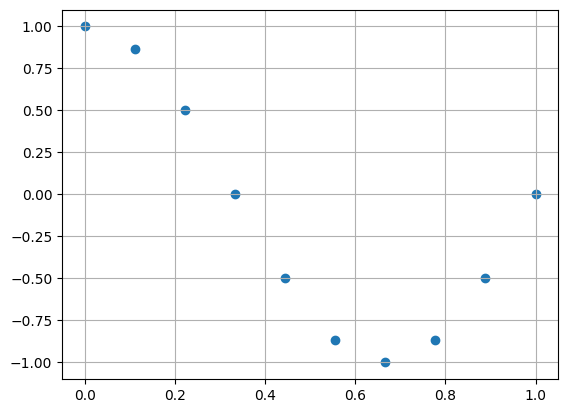

In [18]:
plt.scatter(X, y)
plt.grid(True)

# Linear regression

In [19]:
def init(dimension):
    return np.random.randn(dimension, 1), np.random.randn(1, 1)

def model(X, a, b):
    return X @ a + b

def loss(y_pred, y):
    return 1/y.shape[1] * np.sum(y_pred - y) ** 2

def update(X, y, a, b, learning_rate):
    y_pred = model(X, a, b)
    da = np.mean((2*y_pred - y) * X)
    db = np.mean(np.sum(2*y_pred - y))

    a = a - learning_rate * da
    b = b - learning_rate * db

    return a, b

def linear_regression(X, y, nb_iteration, learning_rate):
    a, b = init(X.shape[1])
    losses = []
    for _ in range(nb_iteration):
        y_pred = model(X, a, b)
        losses.append(loss(y_pred, y))
        a, b = update(X, y, a, b, learning_rate)
    return losses, a, b

In [20]:
history, a, b = linear_regression(X, y, nb_iteration=1000, learning_rate=1e-4)

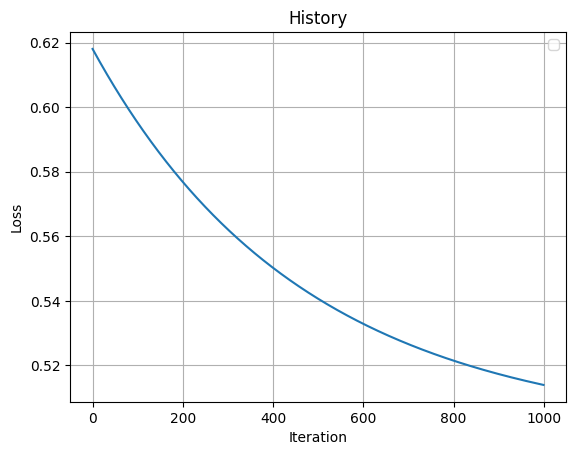

In [21]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("History")
plt.grid(True)
plt.legend()

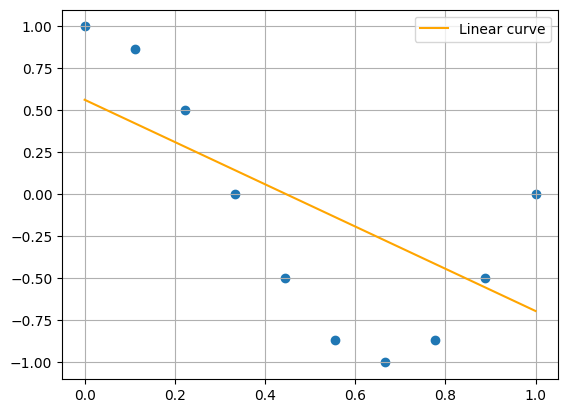

In [22]:
plt.scatter(X ,y)
plt.plot(X, X* a + b, c="orange", label="Linear curve")
plt.grid(True)
plt.legend()

# Regression with n parameters

In [148]:
def init(dimension, degree):
    wi = [np.random.randn(dimension, 1) for _ in range(degree + 1)]
    return np.array(wi), np.random.randn(1, 1)

def model(X, wi, b):
    result = sum([X**i @ wi[i] for i in range(len(wi))])
    return result + b

def loss(y_pred, y):
    return np.mean((y_pred - y) ** 2)

def update(X, y, wi, b, learning_rate):
    y_pred = model(X, wi, b)
    error = y_pred - y

    dw = [np.mean(2 * error * X**i, axis=0, keepdims=True) for i in range(len(wi))]
    db = np.mean(2 * error)

    wi = [w - learning_rate * grad_w for w, grad_w in zip(wi, dw)]
    b = b - learning_rate * db

    return np.array(wi), b

def polynomiale_regression(X, y, nb_iteration, learning_rate, degree):
    np.random.seed(0)
    wi, b = init(X.shape[1], degree=degree)
    losses = []
    for _ in range(nb_iteration):
        y_pred = model(X, wi, b)
        losses.append(loss(y_pred, y))
        wi, b = update(X, y, wi, b, learning_rate)
    return losses, wi, b


In [226]:
np.random.seed(0)
n_samples = 100

X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [229]:
history, wi, b = polynomiale_regression(X, y, nb_iteration=100, learning_rate=0.40, degree=4)

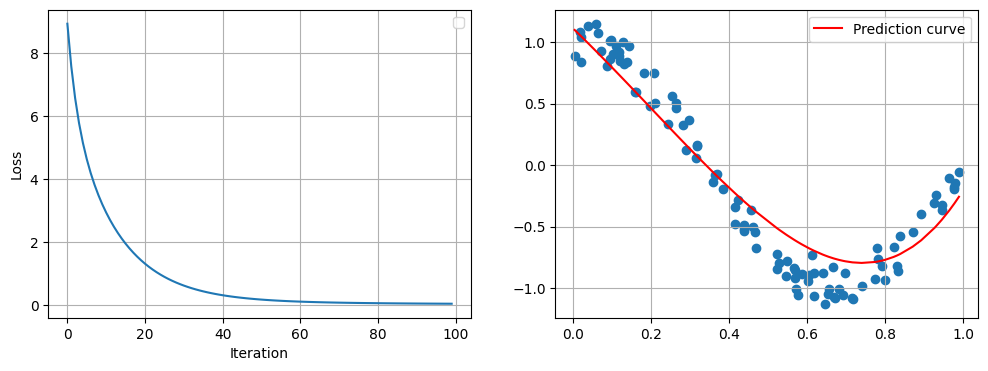

In [231]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
y_pred = model(X, wi, b)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red", label="Prediction curve")
plt.grid(True)

plt.legend()

# Exercice II : sur-apprentissage Vs sous-apprentissage (classification)

* En s'inspirant de l'exercice I, illustrer les problèmes de sur-apprentissage et de sous-apprentissage sur un jeu de données de classification.

1. Générer un jeu de données de classification

In [240]:
from sklearn.datasets import make_circles

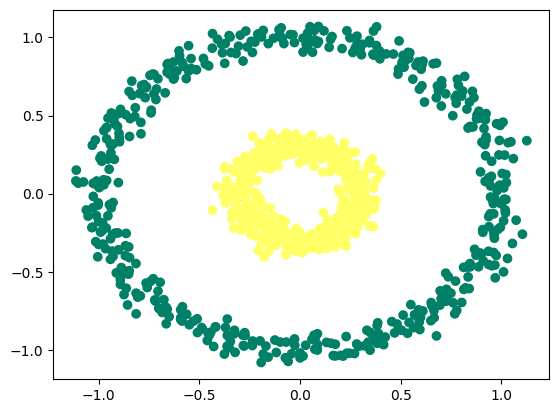

In [258]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")

2. Divisier le jeu de données en données d'apprentissage et données test. Apprendre un SVM avec un noyau RBF pour plusieurs paramètres du noyau sur l ejeu de données d'apprentissage et calculer le score de prédiction sur le jeu de données test.

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [266]:
nb_iteration = 20
gamma = [1e2, 1e1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
scores = []

for g in gamma:
    current_score = []
    for _ in range(nb_iteration):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
        model = svm.SVC(kernel='rbf', gamma=g)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        current_score.append(accuracy_score(y_test, y_pred))
    scores.append(np.mean(current_score))

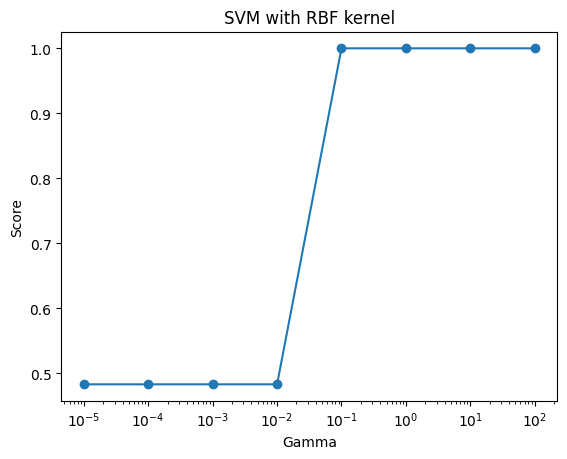

In [268]:
plt.plot(gamma, scores, marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('SVM with RBF kernel')
plt.show()

3. Dessiner les frontières de décision obtenues pour des valeurs différentes du paramètre du noyau permettant d'illustrer les problèmes de sous-apprentissage et de sur-apprentissage.

In [269]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap="coolwarm")
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

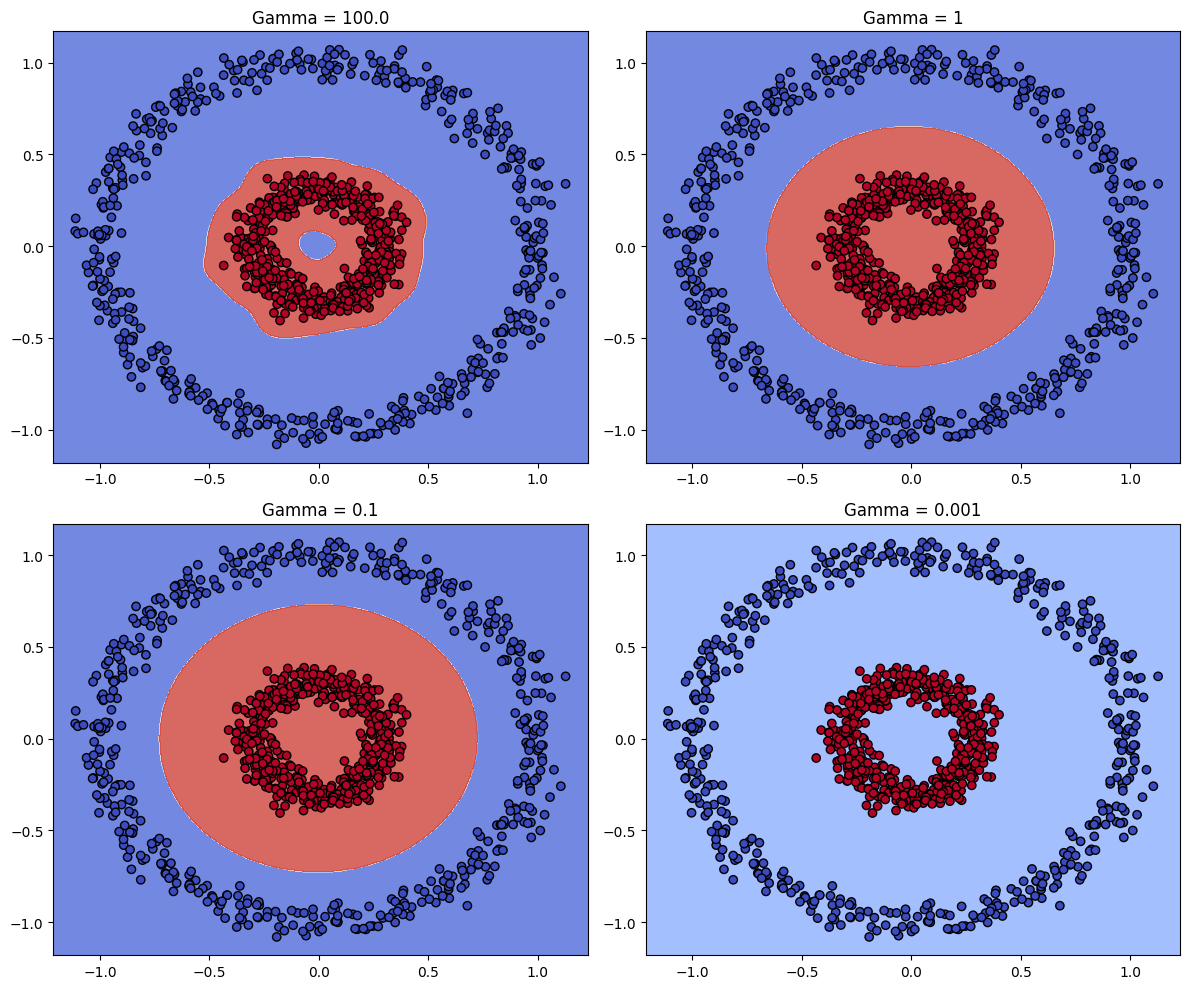

In [272]:
gamma_values = [1e2, 1, 1e-1, 1e-3]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, gamma in zip(axes.ravel(), gamma_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    model = svm.SVC(kernel='rbf', gamma=gamma)
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X, y, ax, f"Gamma = {gamma}")

plt.tight_layout()
plt.show()

# Exercice III : compromis biais-varaiance

Le but de cet exercice est d'illustrer la décomposition biais-variance du classifieur $k$-plus proches voisins (pour un exemple d'utilisation des $k$-plus proches voisins avec scikit-learn, voir https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

1. Installer la bibliothèque [mlxtend](http://rasbt.github.io/mlxtend/).

2. Charger le jeu de données boston housing et séparer les données en des données d'apprentissage et de test.

3. Utiliser la fonction [bias_variance_decomp](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/#api) de [mlxtend](http://rasbt.github.io/mlxtend/) pour calculer l'erreur totale du classifier ainsi que le bias et la variance pour des valeurs de $k$ dans $[1,35]$

4. Tracer les courbes de l'erreur, du bais et de la variance. Choisir une bonne valeur de $k$.

In [284]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mlxtend.data import boston_housing_data
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [285]:
X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

In [286]:
X.shape, y.shape

((506, 13), (506,))

100%|██████████| 35/35 [00:10<00:00,  3.41it/s]


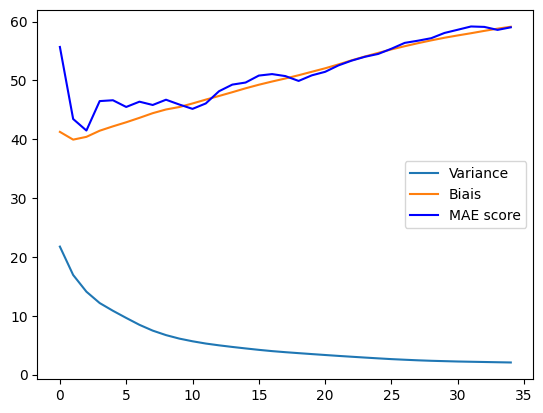

In [293]:
k = np.arange(1, 36)
scores = []
bias = []
var = []
for neighbor in tqdm(range(len(k))):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        random_state=123,
                                                        test_size=0.3,
                                                        shuffle=True)
    model = KNeighborsRegressor(n_neighbors=k[neighbor])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(mean_squared_error(y_pred, y_test))
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)
    bias.append(avg_bias)
    var.append(avg_var)

plt.plot(var, label="Variance")
plt.plot(bias, label="Biais")
plt.plot(scores, label="MAE score", c="blue")
plt.legend()